## Getting the data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [12]:
# data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data = pd.read_pickle("ADAUSDT_1m.pkl")
data.set_index("Time", inplace=True)
data

,Open,High,Low,Close,Volume
Time,,,,,
2019-01-01 00:00:00,0.04057,0.04059,0.04052,0.04052,47716.3
2019-01-01 00:01:00,0.04052,0.04054,0.04035,0.04035,136850.9
2019-01-01 00:02:00,0.04035,0.04049,0.04035,0.04049,39914.3
2019-01-01 00:03:00,0.04036,0.04041,0.04031,0.04031,42206.3
2019-01-01 00:04:00,0.04032,0.04039,0.04030,0.04034,45568.5
...,...,...,...,...,...
2024-09-30 23:55:00,0.37310,0.37350,0.37280,0.37340,54432.1
2024-09-30 23:56:00,0.37340,0.37380,0.37330,0.37360,59362.0
2024-09-30 23:57:00,0.37360,0.37380,0.37350,0.37360,21189.9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019889 entries, 2019-01-01 00:00:00 to 2024-09-30 23:59:00
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
 4   Volume  float64
dtypes: float64(5)
memory usage: 138.2 MB


In [14]:
data = data[["Close"]].copy()

In [15]:
data

,Close
Time,
2019-01-01 00:00:00,0.04052
2019-01-01 00:01:00,0.04035
2019-01-01 00:02:00,0.04049
2019-01-01 00:03:00,0.04031
2019-01-01 00:04:00,0.04034
...,...
2024-09-30 23:55:00,0.37340
2024-09-30 23:56:00,0.37360
2024-09-30 23:57:00,0.37360


In [16]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [17]:
data

,Close,returns
Time,,
2019-01-01 00:00:00,0.04052,NaN
2019-01-01 00:01:00,0.04035,-0.004204
2019-01-01 00:02:00,0.04049,0.003464
2019-01-01 00:03:00,0.04031,-0.004455
2019-01-01 00:04:00,0.04034,0.000744
...,...,...
2024-09-30 23:55:00,0.37340,0.000804
2024-09-30 23:56:00,0.37360,0.000535
2024-09-30 23:57:00,0.37360,0.000000


In [18]:
(0.04034-0.04031)/0.04031

0.0007442322004465951

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019889 entries, 2019-01-01 00:00:00 to 2024-09-30 23:59:00
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Close    float64
 1   returns  float64
dtypes: float64(2)
memory usage: 69.1 MB


## Formulating a Triple SMA Crossover Strategy

In [20]:
SMA_S = 15
SMA_M = 50
SMA_L = 200

In [21]:
data["SMA_S"] = data.Close.rolling(window = SMA_S).mean()
data["SMA_M"] = data.Close.rolling(window = SMA_M).mean()
data["SMA_L"] = data.Close.rolling(window = SMA_L).mean()

In [22]:
data

,Close,returns,SMA_S,SMA_M,SMA_L
Time,,,,,
2019-01-01 00:00:00,0.04052,NaN,NaN,NaN,NaN
2019-01-01 00:01:00,0.04035,-0.004204,NaN,NaN,NaN
2019-01-01 00:02:00,0.04049,0.003464,NaN,NaN,NaN
2019-01-01 00:03:00,0.04031,-0.004455,NaN,NaN,NaN
2019-01-01 00:04:00,0.04034,0.000744,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-30 23:55:00,0.37340,0.000804,0.372287,0.374592,0.378822
2024-09-30 23:56:00,0.37360,0.000535,0.372433,0.374538,0.378785
2024-09-30 23:57:00,0.37360,0.000000,0.372607,0.374480,0.378748


In [23]:
data.dropna(inplace = True)

In [24]:
smas = ["SMA_S", "SMA_M", "SMA_L"]
smas

['SMA_S', 'SMA_M', 'SMA_L']

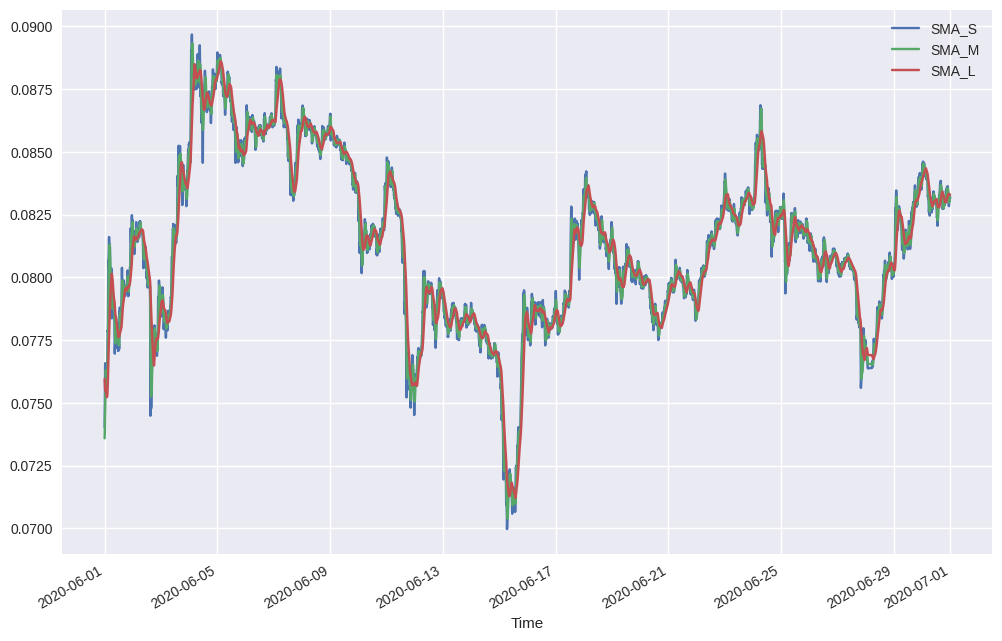

In [25]:
data.loc["06-2020", smas].plot(figsize = (12, 8))
plt.show()

In [26]:
data["position"] = 0 # Trading position -> Neutral for all bars
data

,Close,returns,SMA_S,SMA_M,SMA_L,position
Time,,,,,,
2019-01-01 03:19:00,0.04002,0.000000,0.039933,0.039834,0.040076,0
2019-01-01 03:20:00,0.04006,0.000999,0.039945,0.039838,0.040073,0
2019-01-01 03:21:00,0.04006,0.000000,0.039957,0.039843,0.040072,0
2019-01-01 03:22:00,0.04006,0.000000,0.039967,0.039848,0.040070,0
2019-01-01 03:23:00,0.04006,0.000000,0.039977,0.039854,0.040069,0
...,...,...,...,...,...,...
2024-09-30 23:55:00,0.37340,0.000804,0.372287,0.374592,0.378822,0
2024-09-30 23:56:00,0.37360,0.000535,0.372433,0.374538,0.378785,0
2024-09-30 23:57:00,0.37360,0.000000,0.372607,0.374480,0.378748,0


In [27]:
cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L) # long position
cond1

Time
2019-01-01 03:19:00    False
2019-01-01 03:20:00    False
2019-01-01 03:21:00    False
2019-01-01 03:22:00    False
2019-01-01 03:23:00    False
                       ...  
2024-09-30 23:55:00    False
2024-09-30 23:56:00    False
2024-09-30 23:57:00    False
2024-09-30 23:58:00    False
2024-09-30 23:59:00    False
Length: 3019690, dtype: bool

In [28]:
cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L) # short position
cond2

Time
2019-01-01 03:19:00    False
2019-01-01 03:20:00    False
2019-01-01 03:21:00    False
2019-01-01 03:22:00    False
2019-01-01 03:23:00    False
                       ...  
2024-09-30 23:55:00     True
2024-09-30 23:56:00     True
2024-09-30 23:57:00     True
2024-09-30 23:58:00     True
2024-09-30 23:59:00     True
Length: 3019690, dtype: bool

In [29]:
data.loc[cond1, "position"] = 1
data.loc[cond2, "position"] = -1

In [30]:
data.position.value_counts()

position
 0    1253590
 1     885815
-1     880285
Name: count, dtype: int64

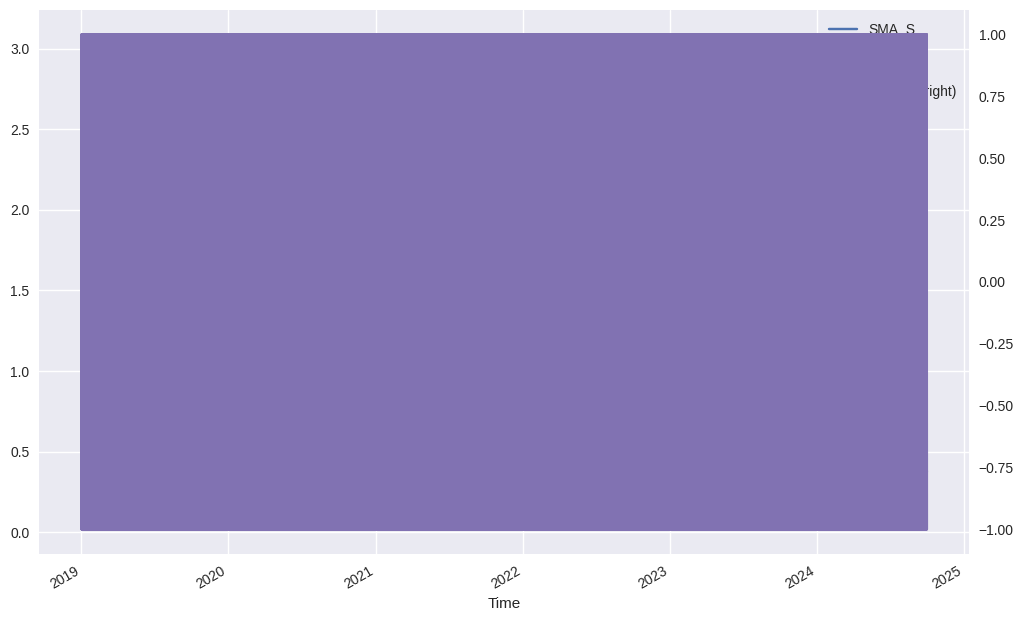

In [31]:
data.loc[:, smas + ["position"]].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

## Backtesting

In [52]:
class Long_Short_Backtester():
    ''' Class for the vectorized backtesting of simple Long-Short trading strategies.
    
    Attributes
    ============
    filepath: str
        local filepath of the dataset (csv-file)
    symbol: str
        ticker symbol (instrument) to be backtested
    start: str
        start date for data import
    end: str
        end date for data import
    tc: float
        proportional trading costs per trade
    
    
    Methods
    =======
    get_data:
        imports the data.
        
    test_strategy:
        prepares the data and backtests the trading strategy incl. reporting (wrapper).
        
    prepare_data:
        prepares the data for backtesting.
    
    run_backtest:
        runs the strategy backtest.
        
    plot_results:
        plots the cumulative performance of the trading strategy compared to buy-and-hold.
        
    optimize_strategy:
        backtests strategy for different parameter values incl. optimization and reporting (wrapper).
    
    find_best_strategy:
        finds the optimal strategy (global maximum).
         
        
    print_performance:
        calculates and prints various performance metrics.
        
    '''    
    
    def __init__(self, filepath, symbol, start, end, tc):
        
        self.filepath = filepath
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        self.tp_year = (self.data.Close.count() / ((self.data.index[-1] - self.data.index[0]).days / 365.25))
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data.
        '''
        # raw = pd.read_csv(self.filepath, parse_dates = ["Date"], index_col = "Date")
        raw = pd.read_pickle(self.filepath)
        raw.set_index(['Time'], inplace = True)
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        self.data = raw
        
    def test_strategy(self, smas):
        '''
        Prepares the data and backtests the trading strategy incl. reporting (Wrapper).
         
        Parameters
        ============
        smas: tuple (SMA_S, SMA_M, SMA_L)
            Simple Moving Averages to be considered for the strategy.
            
        '''
        
        self.SMA_S = smas[0]
        self.SMA_M = smas[1]
        self.SMA_L = smas[2]
        
        
        self.prepare_data(smas = smas)
        self.run_backtest()
        
        data = self.results.copy()
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        self.print_performance()
    
    def prepare_data(self, smas):
        ''' Prepares the Data for Backtesting.
        '''
        ########################## Strategy-Specific #############################
        
        data = self.data[["Close", "returns"]].copy()
        data["SMA_S"] = data.Close.rolling(window = smas[0]).mean()
        data["SMA_M"] = data.Close.rolling(window = smas[1]).mean()
        data["SMA_L"] = data.Close.rolling(window = smas[2]).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1

        ##########################################################################
        
        self.results = data


    def run_backtest(self):
        ''' Runs the strategy backtest for Long and Short positions only (ignores neutral positions).
        '''
        
        data = self.results.copy()
        data["strategy"] = 0  # Inicializando com 0 para evitar valores NaN.
        
        # Variáveis para acumular os retornos durante uma posição
        cumulative_return = 0
        previous_position = 0
        
        for i in range(1, len(data)):
            current_position = data["position"].iloc[i]
            current_return = data["returns"].iloc[i]
            
            # Acumula o retorno apenas para posições de compra (1) ou venda (-1)
            if current_position in [1, -1] and current_position == previous_position:
                cumulative_return += current_position * current_return
            
            # Houve uma mudança de posição de compra/venda ou entrou na posição neutra (0)
            elif previous_position in [1, -1] and current_position != previous_position:
                # Registra o retorno acumulado na mudança de posição
                data["strategy"].iloc[i] = cumulative_return
                
                # Aplica o custo de transação apenas na mudança de posição
                data["strategy"].iloc[i] -= self.tc
                
                # Reinicia o retorno acumulado após a mudança de posição
                cumulative_return = 0
            
            # Atualiza a posição anterior
            previous_position = current_position
        
        # Atualiza os resultados com os novos cálculos
        self.results = data


    
    
        
    def plot_results(self):
        '''  Plots the cumulative performance of the trading strategy compared to buy-and-hold.
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_strategy(self, SMA_S_range, SMA_M_range, SMA_L_range, metric = "Multiple"):
        '''
        Backtests strategy for different parameter values incl. Optimization and Reporting (Wrapper).
         
        Parameters
        ============
        SMA_S_range: tuple
            tuples of the form (start, end, step size).
        
        SMA_M_range: tuple
            tuples of the form (start, end, step size).
            
        SMA_L_range: tuple
            tuples of the form (start, end, step size).
        
        metric: str
            performance metric to be optimized (can be "Multiple" or "Sharpe")
        '''
        
        self.metric = metric
        
        if metric == "Multiple":
            performance_function = self.calculate_multiple
        elif metric == "Sharpe":
            performance_function = self.calculate_sharpe
        
        SMA_S_range = range(*SMA_S_range)
        SMA_M_range = range(*SMA_M_range)
        SMA_L_range = range(*SMA_L_range)
        
        combinations = list(product(SMA_S_range, SMA_M_range, SMA_L_range))
         
        performance = []
        for comb in combinations:
            print(comb)
            self.prepare_data(smas = comb)
            self.run_backtest()
            performance.append(performance_function(self.results.strategy))
    
        self.results_overview =  pd.DataFrame(data = np.array(combinations), columns = ["SMA_S", "SMA_M", "SMA_L"])
        self.results_overview["performance"] = performance
        self.find_best_strategy()
        
        
    def find_best_strategy(self):
        ''' Finds the optimal strategy (global maximum).
        '''
        
        best = self.results_overview.nlargest(1, "performance")
        SMA_S = best.SMA_S.iloc[0]
        SMA_M = best.SMA_M.iloc[0]
        SMA_L = best.SMA_L.iloc[0]
        perf = best.performance.iloc[0]
        print("SMA_S: {} | SMA_M: {} | SMA_L : {} | {}: {}".format(SMA_S, SMA_M, SMA_L, self.metric, round(perf, 5)))  
        self.test_strategy(smas = (SMA_S, SMA_M, SMA_L))
            
    ############################## Performance ######################################
    
    def print_performance(self):
        ''' Calculates and prints various Performance Metrics.
        '''
        
        data = self.results.copy()
        strategy_multiple = round(self.calculate_multiple(data.strategy), 6)
        bh_multiple =       round(self.calculate_multiple(data.returns), 6)
        outperf =           round(strategy_multiple - bh_multiple, 6)
        cagr =              round(self.calculate_cagr(data.strategy), 6)
        ann_mean =          round(self.calculate_annualized_mean(data.strategy), 6)
        ann_std =           round(self.calculate_annualized_std(data.strategy), 6)
        sharpe =            round(self.calculate_sharpe(data.strategy), 6)
       
        print(100 * "=")
        print("TRIPLE SMA STRATEGY | INSTRUMENT = {} | SMAs = {}".format(self.symbol, [self.SMA_S, self.SMA_M, self.SMA_L]))
        print(100 * "-")
        print("PERFORMANCE MEASURES:")
        print("\n")
        print("Multiple (Strategy):         {}".format(strategy_multiple))
        print("Multiple (Buy-and-Hold):     {}".format(bh_multiple))
        print(38 * "-")
        print("Out-/Underperformance:       {}".format(outperf))
        print("\n")
        print("CAGR:                        {}".format(cagr))
        print("Annualized Mean:             {}".format(ann_mean))
        print("Annualized Std:              {}".format(ann_std))
        print("Sharpe Ratio:                {}".format(sharpe))
        
        print(100 * "=")
        
    def calculate_multiple(self, series):
        return np.exp(series.sum())
    
    def calculate_cagr(self, series):
        return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1
    
    def calculate_annualized_mean(self, series):
        return series.mean() * self.tp_year
    
    def calculate_annualized_std(self, series):
        return series.std() * np.sqrt(self.tp_year)
    
    def calculate_sharpe(self, series):
        if series.std() == 0:
            return np.nan
        else:
            return self.calculate_cagr(series) / self.calculate_annualized_std(series)

    
    


    

In [79]:
# filepath = "bitcoin.csv"
filepath = "ADAUSDT_1m.pkl"
symbol = "ADAUSDT"
start = "2023-01-01"
end = "2024-10-01"
# tc = -0.00085
tc = -0.001
sma_s = 100 
sma_m = 600 
sma_l = 2000 

In [80]:
tc

-0.001

In [81]:
tester = Long_Short_Backtester(filepath = filepath, symbol = symbol,
                              start = start, end = end, tc = tc)

In [82]:
tester.data

,Open,High,Low,Close,Volume,returns
Time,,,,,,
2023-01-01 00:00:00,0.2458,0.2458,0.2456,0.2458,27891.9,NaN
2023-01-01 00:01:00,0.2458,0.2459,0.2458,0.2458,7442.9,0.000000
2023-01-01 00:02:00,0.2459,0.2459,0.2458,0.2458,51585.0,0.000000
2023-01-01 00:03:00,0.2458,0.2458,0.2457,0.2458,6011.5,0.000000
2023-01-01 00:04:00,0.2457,0.2457,0.2454,0.2456,181402.6,-0.000814
...,...,...,...,...,...,...
2024-09-30 23:55:00,0.3731,0.3735,0.3728,0.3734,54432.1,0.000804
2024-09-30 23:56:00,0.3734,0.3738,0.3733,0.3736,59362.0,0.000535
2024-09-30 23:57:00,0.3736,0.3738,0.3735,0.3736,21189.9,0.000000


In [83]:
tester.test_strategy(smas = (sma_s, sma_m, sma_l))

TRIPLE SMA STRATEGY | INSTRUMENT = ADAUSDT | SMAs = [100, 600, 2000]
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         7.391749
Multiple (Buy-and-Hold):     1.466798
--------------------------------------
Out-/Underperformance:       5.924951


CAGR:                        2.148703
Annualized Mean:             1.147686
Annualized Std:              0.564741
Sharpe Ratio:                3.80476


In [84]:
tester.results

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,creturns,cstrategy
Time,,,,,,,,,
2023-01-02 09:19:00,0.2547,0.000786,0.254562,0.250213,0.247428,1,0.0,1.000786,1.000000
2023-01-02 09:20:00,0.2547,0.000000,0.254568,0.250222,0.247433,1,0.0,1.000786,1.000000
2023-01-02 09:21:00,0.2549,0.000785,0.254576,0.250231,0.247437,1,0.0,1.001572,1.000000
2023-01-02 09:22:00,0.2550,0.000392,0.254591,0.250240,0.247442,1,0.0,1.001965,1.000000
2023-01-02 09:23:00,0.2548,-0.000785,0.254600,0.250249,0.247447,1,0.0,1.001179,1.000000
...,...,...,...,...,...,...,...,...,...
2024-09-30 23:55:00,0.3734,0.000804,0.376511,0.380246,0.389453,-1,0.0,1.467191,7.391749
2024-09-30 23:56:00,0.3736,0.000535,0.376448,0.380227,0.389441,-1,0.0,1.467976,7.391749
2024-09-30 23:57:00,0.3736,0.000000,0.376389,0.380208,0.389429,-1,0.0,1.467976,7.391749


In [85]:
tester.results[tester.results['strategy'] != 0]

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,creturns,cstrategy
Time,,,,,,,,,
2023-01-02 15:13:00,0.2536,0.000000,0.253139,0.253148,0.248981,0,-0.003328,0.996464,0.996677
2023-01-02 23:51:00,0.2536,0.000394,0.254453,0.254461,0.251450,0,-0.003330,0.996464,0.993364
2023-01-03 08:16:00,0.2525,-0.000792,0.253469,0.253473,0.252776,0,-0.004918,0.992141,0.988490
2023-01-03 12:45:00,0.2542,0.000393,0.253915,0.253440,0.253440,0,0.000213,0.998821,0.988701
2023-01-04 00:04:00,0.2530,0.000791,0.252059,0.252050,0.253338,0,0.001791,0.994106,0.990473
...,...,...,...,...,...,...,...,...,...
2024-09-28 02:21:00,0.4036,0.000744,0.402657,0.402651,0.403806,0,-0.001234,1.585855,7.397251
2024-09-28 11:49:00,0.3998,0.000250,0.400288,0.400271,0.403619,0,-0.000001,1.570923,7.397242
2024-09-29 04:45:00,0.3995,-0.000751,0.399433,0.399427,0.400656,0,0.003498,1.569745,7.423164


In [86]:
tester.results[tester.results['strategy'] != 0].describe()

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,creturns,cstrategy
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.0,1430.000000,1430.000000,1430.000000
mean,0.401208,0.000048,0.401228,0.401202,0.401194,0.0,0.001399,1.576455,2.917144
std,0.118203,0.001030,0.118459,0.118445,0.118227,0.0,0.019673,0.464451,1.868099
min,0.241600,-0.005929,0.241110,0.241104,0.244245,0.0,-0.041448,0.949312,0.899273
25%,0.316825,-0.000390,0.316724,0.316713,0.317594,0.0,-0.006792,1.244892,1.265611
50%,0.377400,0.000000,0.377009,0.377002,0.377144,0.0,-0.001985,1.482908,2.167818
75%,0.456650,0.000514,0.455209,0.455834,0.457805,0.0,0.003852,1.794303,4.029218
max,0.777100,0.006219,0.784115,0.784145,0.770232,0.0,0.290439,3.053438,7.516456


In [87]:
def get_buy_operations(results):
    ''' 
    Retorna um DataFrame com as entradas e saídas das operações de compra (position == 1).
    
    Parameters
    ==========
    results: pd.DataFrame
        DataFrame contendo os resultados do backtest, com colunas como:
        Close, returns, SMA_S, SMA_M, SMA_L, position, strategy, trades, creturns, cstrategy.
        
    Returns
    =======
    buy_operations: pd.DataFrame
        DataFrame contendo as entradas e saídas das operações de compra, com colunas:
        - 'Start': índice de início da compra (entrada).
        - 'End': índice de término da compra (saída).
        - 'Start_Close': Preço de fechamento na entrada da compra.
        - 'End_Close': Preço de fechamento na saída da compra.
        - 'Profit': Lucro total da operação.
    '''
    
    operations = []
    start_index = None
    start_close = None
    
    # Itera sobre o DataFrame para identificar mudanças de posição
    for i in range(1, len(results)):
        current_position = results["position"].iloc[i]
        previous_position = results["position"].iloc[i-1]
        current_close = results["Close"].iloc[i]
        
        # Identifica o início da compra (mudança de 0 ou -1 para 1)
        if current_position == 1 and previous_position != 1:
            start_index = results.index[i]
            start_close = results["Close"].iloc[i]
        
        # Identifica o fim da compra (mudança de 1 para 0 ou -1)
        elif current_position != 1 and previous_position == 1:
            end_index = results.index[i]
            end_close = results["Close"].iloc[i]
            cumulative_profit = results["strategy"].iloc[i]
            
            # Armazena a operação de compra
            operations.append({
                "Start": start_index,
                "End": end_index,
                "Start_Close": start_close,
                "End_Close": end_close,
                "Profit": cumulative_profit
            })
    
    # Criando o DataFrame de operações de compra
    buy_operations = pd.DataFrame(operations)
    
    return buy_operations


In [88]:
buy_operations = get_buy_operations(tester.results)
buy_operations

,Start,End,Start_Close,End_Close,Profit
0,NaT,2023-01-02 15:13:00,NaN,0.2536,-0.003328
1,2023-01-02 15:40:00,2023-01-02 23:51:00,0.2546,0.2536,-0.003330
2,2023-01-03 06:39:00,2023-01-03 08:16:00,0.2542,0.2525,-0.004918
3,2023-01-03 10:17:00,2023-01-03 12:45:00,0.2543,0.2542,0.000213
4,2023-01-04 04:02:00,2023-01-04 12:38:00,0.2644,0.2643,0.001378
...,...,...,...,...,...
681,2024-09-25 19:31:00,2024-09-25 21:06:00,0.3835,0.3830,-0.000827
682,2024-09-26 07:52:00,2024-09-26 20:53:00,0.3954,0.3956,0.000747
683,2024-09-26 22:26:00,2024-09-27 09:16:00,0.4007,0.4063,0.014879
684,2024-09-27 15:21:00,2024-09-27 17:24:00,0.4075,0.4031,-0.008864


In [89]:
buy_operations.Profit.sum()

np.float64(0.9412820626831915)

In [90]:
buy_operations[buy_operations.Profit > 0].shape[0],buy_operations[buy_operations.Profit < 0].shape[0]

(276, 410)

In [91]:
buy_operations.describe()

,Start,End,Start_Close,End_Close,Profit
count,685,686,685.000000,686.000000,686.000000
mean,2023-11-24 14:21:39.766423296,2023-11-24 09:10:38.571428352,0.405852,0.405685,0.001372
min,2023-01-02 15:40:00,2023-01-02 15:13:00,0.244900,0.243500,-0.039142
25%,2023-06-16 22:23:00,2023-06-16 13:10:30,0.323600,0.323500,-0.006750
50%,2023-11-26 06:48:00,2023-11-26 06:19:30,0.380800,0.380600,-0.001699
75%,2024-05-06 07:12:00,2024-05-06 03:04:00,0.456800,0.457275,0.004218
max,2024-09-29 20:22:00,2024-09-29 22:41:00,0.785300,0.777100,0.290439
std,NaN,NaN,0.122777,0.122448,0.020222


In [92]:
def calculate_returns(df, initial_usdt):
    """
    Função que calcula o Return Percentage e simula o reaproveitamento do valor final em USDT 
    para reinvestir após cada operação.

    Parameters:
    - df: DataFrame com as colunas Start, End, Position, Profit, Start_Close, End_Close.
    - initial_usdt: Valor inicial em USDT para o cálculo dos retornos.

    Returns:
    - df atualizado com as colunas Return_Percentage, USDT_Value_Change, Final_USDT, e Final_USDT_Reinvest.
    """
    df["Return_Percentage"] = df["Profit"] * 100  # Multiplicando o Profit por 100 para obter a porcentagem
    df["USDT_Value_Change"] = df["Profit"] * initial_usdt  # Lucro/perda em USDT para cada operação
    df["Final_USDT"] = initial_usdt + df["USDT_Value_Change"].cumsum()  # Valor final após cada operação
    
    # Simulação do reaproveitamento, onde o capital final de uma operação é usado como inicial para a próxima
    df["Final_USDT_Reinvest"] = initial_usdt
    for i in range(1, len(df)):
        df.loc[i, "Final_USDT_Reinvest"] = df.loc[i-1, "Final_USDT_Reinvest"] * (1 + df.loc[i, "Profit"])
    
    return df

    
initial_usdt = 100
new_df = calculate_returns(buy_operations, initial_usdt)

In [93]:
new_df

,Start,End,Start_Close,End_Close,Profit,Return_Percentage,USDT_Value_Change,Final_USDT,Final_USDT_Reinvest
0,NaT,2023-01-02 15:13:00,NaN,0.2536,-0.003328,-0.332816,-0.332816,99.667184,100.000000
1,2023-01-02 15:40:00,2023-01-02 23:51:00,0.2546,0.2536,-0.003330,-0.332986,-0.332986,99.334198,99.667014
2,2023-01-03 06:39:00,2023-01-03 08:16:00,0.2542,0.2525,-0.004918,-0.491834,-0.491834,98.842363,99.176817
3,2023-01-03 10:17:00,2023-01-03 12:45:00,0.2543,0.2542,0.000213,0.021322,0.021322,98.863685,99.197963
4,2023-01-04 04:02:00,2023-01-04 12:38:00,0.2644,0.2643,0.001378,0.137814,0.137814,99.001499,99.334672
...,...,...,...,...,...,...,...,...,...
681,2024-09-25 19:31:00,2024-09-25 21:06:00,0.3835,0.3830,-0.000827,-0.082696,-0.082696,194.126586,225.663828
682,2024-09-26 07:52:00,2024-09-26 20:53:00,0.3954,0.3956,0.000747,0.074706,0.074706,194.201292,225.832413
683,2024-09-26 22:26:00,2024-09-27 09:16:00,0.4007,0.4063,0.014879,1.487879,1.487879,195.689171,229.192525
684,2024-09-27 15:21:00,2024-09-27 17:24:00,0.4075,0.4031,-0.008864,-0.886444,-0.886444,194.802726,227.160860


In [94]:
new_df.USDT_Value_Change.sum()

np.float64(94.12820626831912)

In [95]:
new_df[new_df.Profit > 0].shape[0],new_df[new_df.Profit < 0].shape[0]

(276, 410)

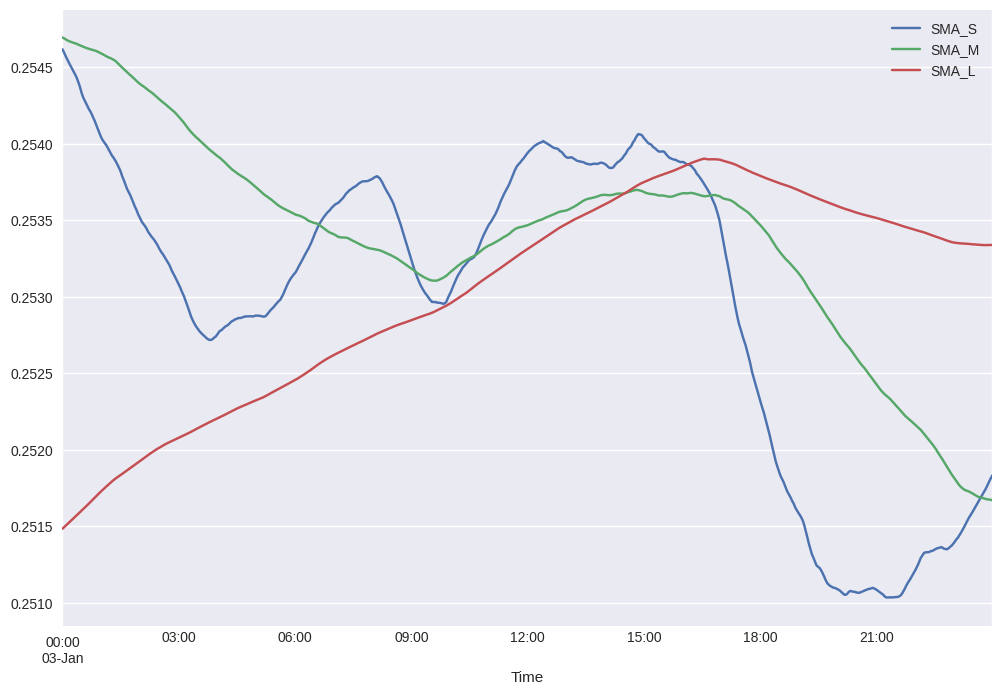

In [70]:
tester.results.loc["2023-01-03", smas].plot(figsize = (12, 8))
plt.show()

In [71]:
tester.results.loc["2023-01-03 11"]

,Close,returns,SMA_S,SMA_M,SMA_L,position,strategy,creturns,cstrategy
Time,,,,,,,,,
2023-01-03 11:00:00,0.2538,-0.000394,0.253473,0.253336,0.253136,1,0.0,0.997250,0.986158
2023-01-03 11:01:00,0.2537,-0.000394,0.253479,0.253338,0.253139,1,0.0,0.996857,0.986158
2023-01-03 11:02:00,0.2538,0.000394,0.253485,0.253340,0.253142,1,0.0,0.997250,0.986158
2023-01-03 11:03:00,0.2536,-0.000788,0.253490,0.253342,0.253145,1,0.0,0.996464,0.986158
2023-01-03 11:04:00,0.2536,0.000000,0.253497,0.253343,0.253147,1,0.0,0.996464,0.986158
2023-01-03 11:05:00,0.2536,0.000000,0.253504,0.253345,0.253150,1,0.0,0.996464,0.986158
2023-01-03 11:06:00,0.2536,0.000000,0.253511,0.253347,0.253153,1,0.0,0.996464,0.986158
2023-01-03 11:07:00,0.2538,0.000788,0.253519,0.253350,0.253156,1,0.0,0.997250,0.986158
2023-01-03 11:08:00,0.2538,0.000000,0.253527,0.253353,0.253159,1,0.0,0.997250,0.986158


In [72]:
# tester.plot_results()

In [73]:
# tester.results

In [74]:
# tester.results.trades.value_counts()

## Optimization

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [76]:
tester.optimize_strategy(SMA_S_range = (100, 500, 100), 
                         SMA_M_range = (600, 1500, 100),
                         SMA_L_range = (2000, 5000, 500),
                         metric = "Multiple")

(100, 600, 2000)
(100, 600, 2500)
(100, 600, 3000)
(100, 600, 3500)
(100, 600, 4000)
(100, 600, 4500)
(100, 700, 2000)
(100, 700, 2500)
(100, 700, 3000)
(100, 700, 3500)
(100, 700, 4000)
(100, 700, 4500)
(100, 800, 2000)
(100, 800, 2500)
(100, 800, 3000)
(100, 800, 3500)
(100, 800, 4000)
(100, 800, 4500)
(100, 900, 2000)
(100, 900, 2500)
(100, 900, 3000)
(100, 900, 3500)
(100, 900, 4000)
(100, 900, 4500)
(100, 1000, 2000)
(100, 1000, 2500)
(100, 1000, 3000)
(100, 1000, 3500)
(100, 1000, 4000)
(100, 1000, 4500)
(100, 1100, 2000)
(100, 1100, 2500)
(100, 1100, 3000)
(100, 1100, 3500)
(100, 1100, 4000)
(100, 1100, 4500)
(100, 1200, 2000)
(100, 1200, 2500)
(100, 1200, 3000)
(100, 1200, 3500)
(100, 1200, 4000)
(100, 1200, 4500)
(100, 1300, 2000)
(100, 1300, 2500)
(100, 1300, 3000)
(100, 1300, 3500)
(100, 1300, 4000)
(100, 1300, 4500)
(100, 1400, 2000)
(100, 1400, 2500)
(100, 1400, 3000)
(100, 1400, 3500)
(100, 1400, 4000)
(100, 1400, 4500)
(200, 600, 2000)
(200, 600, 2500)
(200, 600, 3000)
(

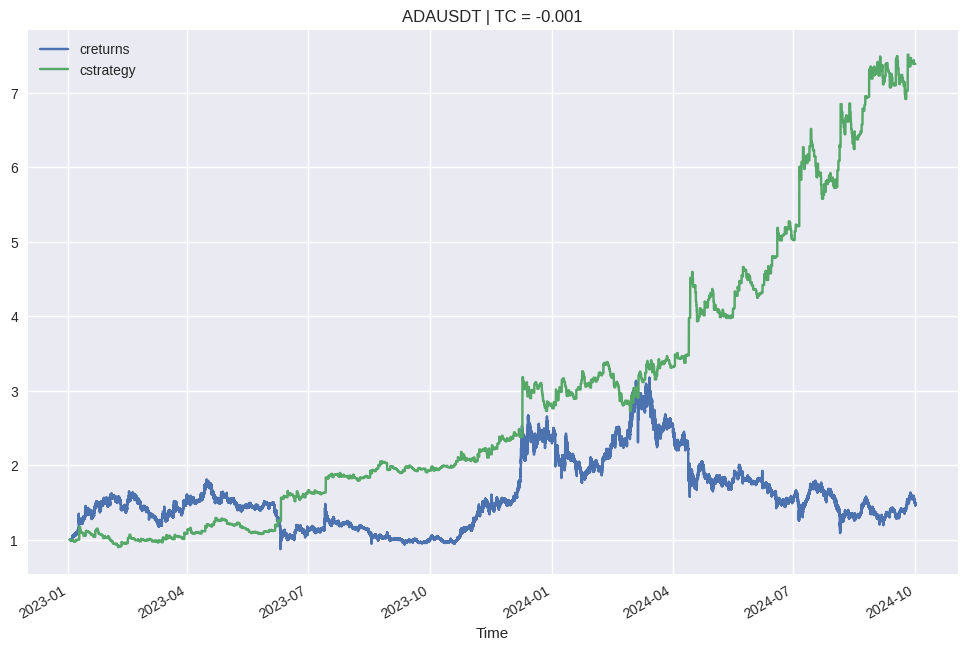

In [78]:
tester.plot_results()

In [77]:
tester.results_overview

,SMA_S,SMA_M,SMA_L,performance
0,100,600,2000,7.391749
1,100,600,2500,6.701502
2,100,600,3000,6.008020
3,100,600,3500,6.232746
4,100,600,4000,4.218636
...,...,...,...,...
211,400,1400,2500,2.314260
212,400,1400,3000,2.623120
213,400,1400,3500,2.158917
214,400,1400,4000,2.467386


## Implementation

In [ ]:
import asyncio
from binance import AsyncClient, BinanceSocketManager
from binance.client import Client
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt # added

In [ ]:
api_key = "insert here"
secret_key = "insert here"

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [ ]:
class LongShortTrader():
    
    def __init__(self, symbol, bar_length, sma_s, sma_m, sma_l, units, position = 0):
        
        self.symbol = symbol
        self.bar_length = bar_length
        self.available_intervals = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h", "8h", "12h", "1d", "3d", "1w", "1M"]
        self.units = units
        self.position = position
        self.trades = 0 
        self.trade_values = []
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = sma_s
        self.SMA_M = sma_m
        self.SMA_L = sma_l
        #************************************************************************
    
    def start_trading(self, historical_days):
        
        self.twm = ThreadedWebsocketManager()
        self.twm.start()
        
        if self.bar_length in self.available_intervals:
            self.get_most_recent(symbol = self.symbol, interval = self.bar_length,
                                 days = historical_days)
            self.twm.start_kline_socket(callback = self.stream_candles,
                                        symbol = self.symbol, interval = self.bar_length)
        # "else" to be added later in the course 
    
    def get_most_recent(self, symbol, interval, days):
    
        now = datetime.now(dt.UTC) # new
        past = str(now - timedelta(days = days))
    
        bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                            start_str = past, end_str = None, limit = 1000)
        df = pd.DataFrame(bars)
        df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
        df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                      "Clos Time", "Quote Asset Volume", "Number of Trades",
                      "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
        df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
        df.set_index("Date", inplace = True)
        for column in df.columns:
            df[column] = pd.to_numeric(df[column], errors = "coerce")
        df["Complete"] = [True for row in range(len(df)-1)] + [False]
        
        self.data = df
    
    def stream_candles(self, msg):
        
        # extract the required items from msg
        event_time = pd.to_datetime(msg["E"], unit = "ms")
        start_time = pd.to_datetime(msg["k"]["t"], unit = "ms")
        first   = float(msg["k"]["o"])
        high    = float(msg["k"]["h"])
        low     = float(msg["k"]["l"])
        close   = float(msg["k"]["c"])
        volume  = float(msg["k"]["v"])
        complete=       msg["k"]["x"]
    
        # stop trading session
        if self.trades >= 5: # stop stream after 5 trades
            self.twm.stop()
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL AND STOP")
                self.position = 0
            else: 
                print("STOP")
        
        else:
            # print out
            print(".", end = "", flush = True) # just print something to get a feedback (everything OK) 
    
            # feed df (add new bar / update latest bar)
            self.data.loc[start_time] = [first, high, low, close, volume, complete]
        
            # prepare features and define strategy/trading positions whenever the latest bar is complete
            if complete == True:
                self.define_strategy()
                self.execute_trades()
        
    def define_strategy(self):
        
        data = self.data.copy()
        
        #******************** define your strategy here ************************
        data = data[["Close"]].copy()
        
        data["SMA_S"] = data.Close.rolling(window = self.SMA_S).mean()
        data["SMA_M"] = data.Close.rolling(window = self.SMA_M).mean()
        data["SMA_L"] = data.Close.rolling(window = self.SMA_L).mean()
        
        data.dropna(inplace = True)
                
        cond1 = (data.SMA_S > data.SMA_M) & (data.SMA_M > data.SMA_L)
        cond2 = (data.SMA_S < data.SMA_M) & (data.SMA_M < data.SMA_L)
        
        data["position"] = 0
        data.loc[cond1, "position"] = 1
        data.loc[cond2, "position"] = -1
        #***********************************************************************
        
        self.prepared_data = data.copy()
    
    def execute_trades(self): 
        if self.prepared_data["position"].iloc[-1] == 1: # if position is long -> go/stay long
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.prepared_data["position"].iloc[-1] == 0: # if position is neutral -> go/stay neutral
            if self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == -1:
                order = client.create_order(symbol = self.symbol, side = "BUY", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            self.position = 0
        if self.prepared_data["position"].iloc[-1] == -1: # if position is short -> go/stay short
            if self.position == 0:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT") 
            elif self.position == 1:
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING NEUTRAL")
                time.sleep(1)
                order = client.create_order(symbol = self.symbol, side = "SELL", type = "MARKET", quantity = self.units)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
    
    def report_trade(self, order, going): 
        
        # extract data from order object
        side = order["side"]
        time = pd.to_datetime(order["transactTime"], unit = "ms")
        base_units = float(order["executedQty"])
        quote_units = float(order["cummulativeQuoteQty"])
        price = round(quote_units / base_units, 5)
        
        # calculate trading profits
        self.trades += 1
        if side == "BUY":
            self.trade_values.append(-quote_units)
        elif side == "SELL":
            self.trade_values.append(quote_units) 
        
        if self.trades % 2 == 0:
            real_profit = round(np.sum(self.trade_values[-2:]), 3) 
            self.cum_profits = round(np.sum(self.trade_values), 3)
        else: 
            real_profit = 0
            self.cum_profits = round(np.sum(self.trade_values[:-1]), 3)
        
        # print trade report
        print(2 * "\n" + 100* "-")
        print("{} | {}".format(time, going)) 
        print("{} | Base_Units = {} | Quote_Units = {} | Price = {} ".format(time, base_units, quote_units, price))
        print("{} | Profit = {} | CumProfits = {} ".format(time, real_profit, self.cum_profits))
        print(100 * "-" + "\n")

In [ ]:
symbol = "BTCUSDT"
bar_length = "1m"
sma_s = 10
sma_m = 20
sma_l = 50
units = 0.01
position = 0

In [ ]:
client.get_account()

In [ ]:
trader = LongShortTrader(symbol = symbol, bar_length = bar_length, sma_s = sma_s, sma_m = sma_m, sma_l = sma_l,
                         units = units, position = position)

In [ ]:
stop_streaming = False # setting a stop_streaming variable (initially: False)

In [ ]:
async def start_trading(historical_days):
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    
    if trader.bar_length in trader.available_intervals:
        trader.get_most_recent(symbol = trader.symbol, interval = trader.bar_length,
                             days = historical_days)
        ts = bm.kline_socket(symbol = trader.symbol, interval = trader.bar_length)        
    # "else" to be added later in the course
    
    async with ts as tscm:
        while True:
            res = await tscm.recv()
            trader.stream_candles(res)
            
            if stop_streaming:
                break

    await client.close_connection()
await start_trading(historical_days = 1/24)

In [ ]:
trader.prepared_data

__Implementation 2__

In [ ]:
symbol = "BTCUSDT"
bar_length = "1h"
sma_s = 15
sma_m = 50
sma_l = 200
units = 0.001
position = 0

In [ ]:
trader = LongShortTrader(symbol = symbol, bar_length = bar_length, sma_s = sma_s, sma_m = sma_m, sma_l = sma_l,
                         units = units, position = position)

We need at least 200 hours of historical data -> 9 days

In [ ]:
stop_streaming = False # setting a stop_streaming variable (initially: False)

In [ ]:
async def start_trading(historical_days):
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    
    if trader.bar_length in trader.available_intervals:
        trader.get_most_recent(symbol = trader.symbol, interval = trader.bar_length,
                             days = historical_days)
        ts = bm.kline_socket(symbol = trader.symbol, interval = trader.bar_length)        
    # "else" to be added later in the course
    
    async with ts as tscm:
        while True:
            res = await tscm.recv()
            trader.stream_candles(res)
            
            if stop_streaming:
                break

    await client.close_connection()
await start_trading(historical_days = 9)

__Troubleshooting (October 2024)__

In case you get a RuntimeError: aiodns needs a SelectorEventLoop in Windows (see screenshot below), please downgrade aiohttp to from version 3.10 to 3.9.5 with the following command:

conda install aiohttp==3.9.5

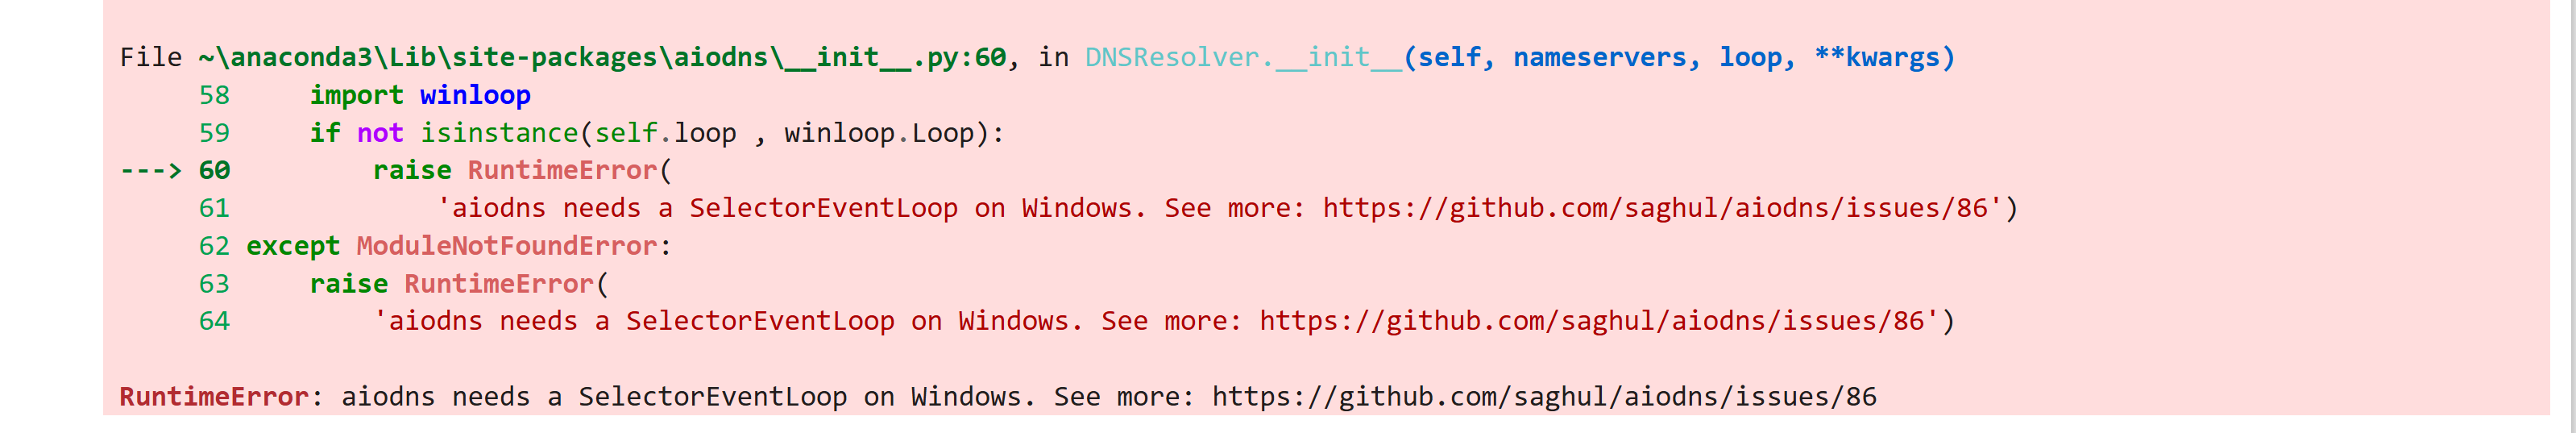